Este estudo investiga a evolução ao longo do tempo da produção de moedas e cédulas no Brasil.
Os dados foram coletados diretamente da API fornecida pelo Banco Central.

- requests é usada para obter dados em formato JSON.
- pandas é usada para manipulação e análise de dados.
- matplotlib é usada para criação de gráficos e visualizações de dados.

In [280]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

- df.info(): número de entradas, tipos de dados das colunas e quantidade de valores não nulos
    - identificação de problemas comuns, como valores ausentes, tipos de dados incorretos
- df.describe(): estatísticas descritivas das colunas numéricas, incluindo média, mediana, mínimo, máximo e quartis
    - identificação de outliers.

In [281]:
url = "https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=100000&$format=json"
request = requests.get(url)
info = request.json()
df = pd.DataFrame(info["value"])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93259 entries, 0 to 93258
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         93259 non-null  object 
 1   Quantidade   93259 non-null  int64  
 2   Valor        93259 non-null  float64
 3   Denominacao  93259 non-null  object 
 4   Especie      93259 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.6+ MB


,Quantidade,Valor
count,9.325900e+04,9.325900e+04
mean,1.584500e+09,1.064389e+10
std,1.719972e+09,2.822610e+10
min,3.375000e+03,6.204000e+04
25%,4.054472e+08,2.307409e+08
50%,7.853082e+08,8.405757e+08
75%,2.405528e+09,4.171314e+09
max,8.092097e+09,1.891460e+11


- filtragem do DataFrame para remover período instável pós-implantação do Plano Real

In [282]:
df['Data'] = pd.to_datetime(df['Data'])
ano_filtro = 1997
mes_filtro = 1
df = df.loc[(df['Data'].dt.year > ano_filtro) | ((df['Data'].dt.year == ano_filtro) & (df['Data'].dt.month >= mes_filtro))]
display(df)

,Data,Quantidade,Valor,Denominacao,Especie
6193,1997-01-02,1371702220,1.371702e+07,0.01,Moedas
6194,1997-01-02,1013528790,5.067644e+07,0.05,Moedas
6195,1997-01-02,1021686579,1.021687e+08,0.10,Moedas
6196,1997-01-02,315575151,7.889379e+07,0.25,Moedas
6197,1997-01-02,401762048,2.008810e+08,0.50,Moedas
...,...,...,...,...,...
93254,2024-03-18,651943589,6.519436e+09,10.00,Cédulas
93255,2024-03-18,687084478,1.374169e+10,20.00,Cédulas
93256,2024-03-18,1673863653,8.369318e+10,50.00,Cédulas
93257,2024-03-18,1830237898,1.830238e+11,100.00,Cédulas


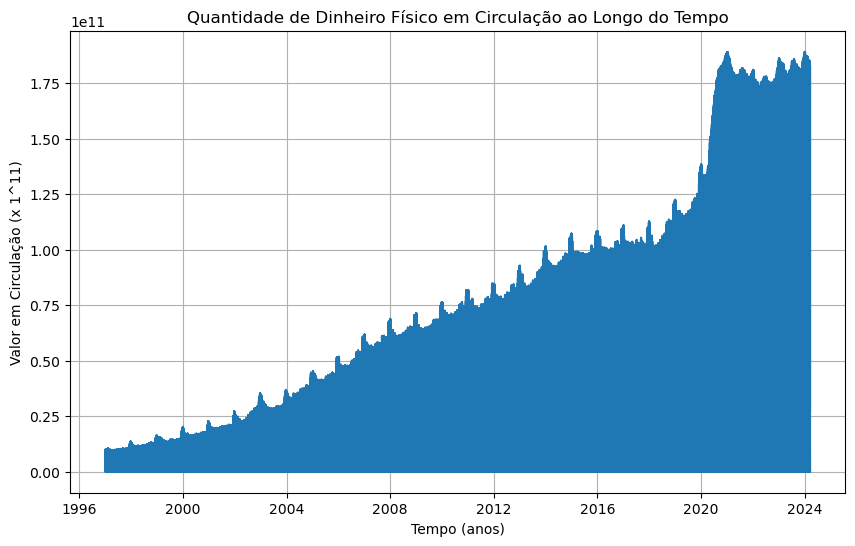

In [283]:
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Valor'])
plt.title('Quantidade de Dinheiro Físico em Circulação ao Longo do Tempo')
plt.xlabel('Tempo (anos)')
plt.ylabel('Valor em Circulação (x 1^11)')
plt.grid(True)
plt.show()

- método groupby permite dividir os dados em grupos com base em critérios específicos e, em seguida, aplicar uma operação (como uma função de agregação) a cada grupo separadamente.
- os valores das médias anuais são então usados no cálculo da taxa de crescimento ano a ano.
- método iloc é usado para selecionar linhas e colunas em um DataFrame.
- anos[1:] - remoção do 1º ano.

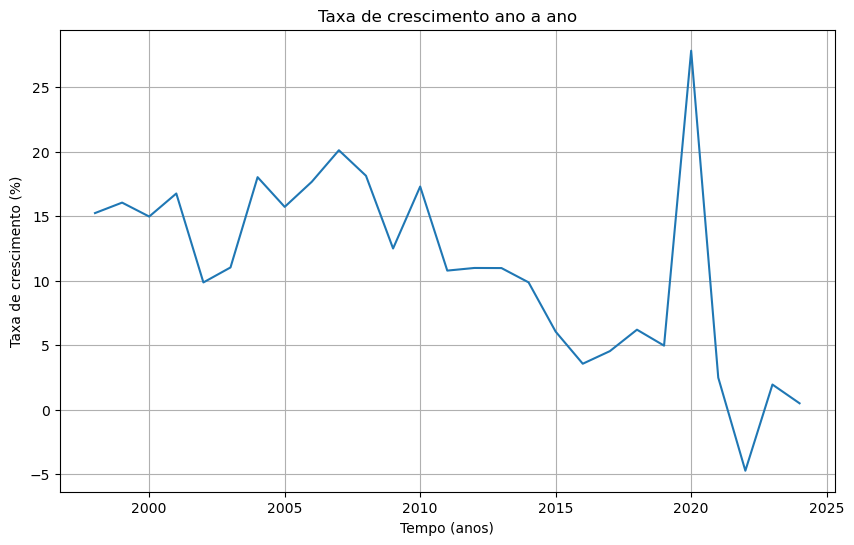

In [284]:
df['Ano'] = df['Data'].dt.year
media_por_ano = df.groupby('Ano')['Valor'].mean()
taxas_crescimento = []
anos = media_por_ano.index.tolist()

for i in range(1, len(media_por_ano)):
    taxa = ((media_por_ano.iloc[i] / media_por_ano.iloc[i - 1]) - 1) * 100
    taxas_crescimento.append(taxa)

plt.figure(figsize=(10, 6))
plt.plot(anos[1:], taxas_crescimento)
plt.title('Taxa de crescimento ano a ano')
plt.xlabel('Tempo (anos)')
plt.ylabel('Taxa de crescimento (%)')
plt.grid(True)
plt.show()